# Alignement de séquences

[Vidéo d'accompagnement](https://vimeo.com/534066780)

## Que veut dire aligner deux séquences?

On dispose de deux séquences $a$ et $b$. **Aligner ces séquences** signifie y *insérer éventuellement des «blancs»* (qu'on représentera par un `-`) de façon que:
1. les séquences obtenues $\hat{a}$ et $\hat{b}$ sont de *même longueur*,
2. deux éléments de *même position* dans $\hat{a}$ et $\hat{b}$ *ne peuvent tout deux être des «blancs»*.

*Exemple*: Si $a={\bf programmer}$ et $b={\bf dormir}$, voici trois alignements:

         programmer       programmer       pr-ogr-ammer
         -do-r-m-ir       d-o-r-mi-r       d-or--m---ir

Bien sûr, certains nous semblent «meilleurs» que d'autres...

## Score pour un alignement

Pour préciser cette idée de «meilleurs» alignements, nous allons attribuer un **score** à ces alignements. Pour chaque position dans les «séquences d'alignement» $\hat{a}$ et $\hat{b}$:
1. si les deux caractères ayant cette position sont *non blancs et coincident*, on gagne un point $\bf +1$,
2. s'ils sont *non blancs et diffèrent*, on est «quitte» $\bf 0$,
3. si l'un d'eux est un *blanc*, on perd un point $\bf -1$.

Le score pour un alignement donné s'obtient en ajoutant ces points pour chaque position.

*Note*: sachez qu'en pratique - notamment en biologie lorsqu'on compare des séquences d'ADN - le «scoring» peut être beaucoup plus poussé de façon à tenir compte de la signification biologique des éléments (nucléotides) à comparer. Néanmoins, le principe reste le même qu'ici.

*Exemple*: Voici les scores des alignements données précédemment:

                 programmer       programmer       pr-ogr-ammer
                 -do-r-m-ir       d-o-r-mi-r       d-or--m---ir
                 !*+!+!+!*+       *!+!+!+*!+       *!!*!!!!!!*+    où !=-1 *=0 et +=1
    scores           0                0               -7

#### Exercice 1

Trouver deux alignements distincts de ${\bf genome}$ et ${\bf enorme}$ ainsi que les scores correspondants.

Par exemple:

      genome    ge-no-me     geno-me     
      enorme    -enorme-     -enorme     
      ****++    !+!**!*!     !+++!++
        2          -3           3

____

## Étude du problème de l'alignement de séquences

**Le problème de l'alignement de séquences consiste à trouver un alignement de score maximal.**

Dans la suite, nous notons $S(a, b)$ le score d'un *alignement optimal* des séquences $a$ et $b$.

**Cas 1**: Examinons le *cas particulier où l'une des séquences est vide*. 

*Exemple*: si $a=\epsilon$ et $b={\bf truc}$ alors le meilleur alignement possible est clairement $\hat{a}={\bf {-}{-}{-}{-}}$ et $\hat{b}=b={\bf truc}$.

Dans ce cas, le «meilleur» alignement possible consiste à *insérer autant de blancs que nécessaire dans la séquence vide* pour un score de: 

$$-1\times «\text{longueur de l'autre séquence}»\\\text{donc}\\ S(\epsilon, b)=-\text{longueur}(b)\text{ ou } S(a, \epsilon)=-\text{longueur}(a)$$

**Cas 2**: À présent, on suppose que *ni $a$ ni $b$ ne sont vides*.

**Conventions de notation**: Par la suite, si $a$ désigne une séquence, $a'$ désigne celle obtenue à partir de $a$ en supprimant son dernier élément.

- *Exemple*: si $a={\bf progr}$ alors $a'={\bf prog}$.

De plus, si $a$ et $b$ désigne deux séquences, $ab$ désigne la séquence obtenue en concaténant $b$ à la suite de $a$.

- *Exemple*: si $a={\bf truc}$ et $b={\bf machin}$ alors $ab={\bf trucmachin}$ et $ba={\bf machintruc}$.

<hr width="50%"/>

Supposons disposer d'un alignement **optimal** $\hat{a}, \hat{b}$ pour deux séquences $a$ et $b$ (non vides donc). 

Si on convient de noter $x$ et $y$ les **derniers caractères** des séquences réalisant l'alignement alors: 

$$\hat{a}=\hat{a}'x\quad\text{et}\quad \hat{b}=\hat{b}'y$$

Trois cas peuvent alors se présenter:
1. **$x$ et $y$ ne sont pas des blancs.**

   Cela ne peut se produire que dans le cas où $x$ et $y$ sont les derniers caractères des chaînes $a$ et $b$.
   
   En supprimant ces caractères, on optient un alignement $\hat{a}'$ et $\hat{b}'$ de $a'$ et $b'$ et il est lui-même **optimal** ... (raisonner par l'absurde ou contentez-vous de l'admettre).
   
   Ainsi, si $x=y$, on ajoute 1 point au score de l'alignement $a', b'$ pour obtenir celui de $a, b$. Sinon, on est «quitte» donc:
   
   $$S(a,b)=\left\{\begin{array}{l}S(a',b')+1&\text{si } x=y\cr S(a',b')&\text{sinon}\end{array}\right.$$
   
   *Exemple* avec $x=y$:   
   $$\begin{array}{l|l|l|l}
   a={\bf abc}&\hat{a}={\bf abc}&a'={\bf ab}&\hat{a}'={\bf ab}\cr
   b={\bf ac}&\hat{b}={\bf a{-}c}&b'={\bf a}&\hat{b}'={\bf a-}\cr
   \text{score}& \hfill 1 \hfill && \hfill 0 \hfill
   \end{array}
   $$

2. **$x$ est un «blanc»**. 

   Dans ce cas, le dernier élément de $b$ ne peut pas être un blanc.
   
   Donc $\hat{a}'$ et $\hat{b}'$ forme un alignement pour $a$ et $b'$ et on peut s'assurer qu'il est lui-même *optimal*...
   
   Enfin, on doit enlever 1 point (blanc aligné avec non blanc) pour passer du score de l'alignement de $a$, $b'$ à celui de $a$, $b$ soit:
   

   $$S(a,b)=S(a,b')-1$$
   
   *Exemple*:   
   $$\begin{array}{l|l|l|l}
   a={\bf ab}&\hat{a}={\bf a{-}b{-}}&a={\bf ab}&\hat{a}'={\bf a{-}b}\cr
   b={\bf adbc}&\hat{b}={\bf adbc}&b'={\bf abd}&\hat{b}'={\bf adb}\cr
   \text{score}& \hfill 0 \hfill && \hfill 1 \hfill
   \end{array}
   $$

3. **$y$ est un «blanc»**.

   Ce cas est symétrique du précédent et donc:

   $$S(a,b)=S(a', b)-1$$

## Récurrence pour les scores d'alignement optimaux

Ainsi, le score d'un alignement optimal de $a$ et $b$ de longueurs respectives $n$ et $m$ est *le maximum des trois scores ci-dessus* (pour deux séquences non vides) et, en combinant les **cas 1 et 2**, on obtient la récurrence:

$$S(a,b)=\left\{\begin{array}{lr}
-n&\text{si }m=0\cr
-m&\text{sinon si }n=0\cr
\max\{S(a',b')+1,S(a,b')-1,S(a',b)-1\}&\text{sinon si }a_n=b_m\cr
\max\{S(a',b'),S(a,b')-1,S(a',b)-1\}&\text{sinon}
\end{array}\right.$$

*Conseil*: Gardez en vue cette récurrence (ou mieux, notez là soigneusement) pour bien comprendre la suite.

#### Exercice 2

Dessiner l'arbre des appels pour le score avec les séquences $a={\bf aa}$ et $b={\bf ab}$. Combien de fois le sous-problème ${\bf a},{\bf a}$ est-il résolu?

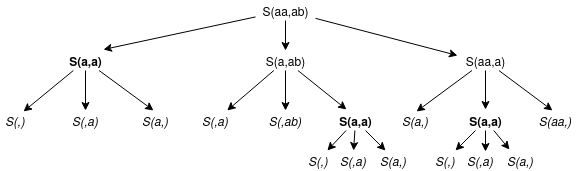

_________

#### Exercice 3

Transposer la récurrence précédente pour écrire la fonction récursive `score_alignement_rec(a, b)` qui calcule le score maximal pour l'alignement des séquences `a` et `b`.

In [ ]:
def score_alignement_rec(a, b):
    n, m = len(a), len(b)
    if len(a) == 0:
        return -m
    if len(b) == 0:
        return -n
    x, y = a[-1], b[-1]
    return max(
        (1 if x == y else 0) + score_alignement_rec(a[:-1],b[:-1]),
        -1 + score_alignement_rec(a[:-1],b),
        -1 + score_alignement_rec(a,b[:-1])
    )

score_alignement_rec("programmer", "dormir")

_________

## Calcul du meilleur score par programmation dynamique

L'algorithme récursif va calculer plusieurs fois les mêmes sous-problèmes comme nous l'avons vu dans l'exercice 1. 

Nous allons donc utiliser la **programmation dynamique** pour mémoriser les solutions des sous-problèmes qu'on va résoudre «des plus petits vers les plus grands».

Mais quels sont les «sous-problèmes» pour des séquences $a$ et $b$ de longueurs respectives $n$ et $m$? Et combien y en a-t-il?

L'opération «prime» (supprimer le dernier élément d'une séquence) peut être appliquée *autant de fois que la séquence a d'éléments*.  En comptant la séquence elle-même, cela donne $\bf n+1$ séquences possibles pour $a$ dans un sous-problème (*rappel*: $\epsilon$ désigne la séquence vide):

$$a, a', a'', \dots, \epsilon$$
De même, il y aura $\bf m+1$ séquences possibles pour $b$.

#### Exercice 4

Préciser la suite $a, a', a'', \dots, \epsilon$ si $a={\bf truc}$

$$a={\bf truc}, a'={\bf tru}, a''={\bf tr}, a'''={\bf t}, a''''=\epsilon \text{ (séquence vide)}$$

______

Comme les sous-problèmes peuvent combiner deux séquences parmi celles-ci, il y en a $\bf (n+1)(m+1)$. On peut visualiser cela comme suit:
                   
                        m+1 colonnes
                      | 𝜖 … b'' b' b
                   ----------------
                   𝜖  | ? … ?   ?  ?
           n+1     …  | …     …
           lignes  a''| ?   ?   *  ?    avec, par exemple, * = S(a'',b')
                   a' | ?   ?   ?  ?
                   a  | ?   ?   ?  ?

où à chaque combinaison ligne, colonne correspond un sous-problème à résoudre.

On va donc utiliser une matrice `mat` a $n+1$ lignes et $m+1$ colonnes pour mémoriser ces solutions; `mat[i][j]` contiendra: 

$$S(<a_1,a_2,\dots,a_i>,<b_1,b_2,\dots,b_j>)\qquad\text{avec } 0\leqslant i\leqslant n\text{ et } 0\leqslant j\leqslant m$$

Autrement dit, `mat[i][j]` contiendra *le score du sous-problème faisant intervenir les **préfixes** de $i$ éléments de $a$ et de $j$ éléments de $b$*. 

Exprimé avec Python, cela donne:

        mat[i][j] = S(a[:i], b[:j])

#### Exercice 5

Construire cette matrice à la main pour $a={\bf dormir}$ et $b={\bf programmer}$ en vous aidant du canevas donné ci-dessous et de la récurrence rappelée ici:

$$S(a,b)=\left\{\begin{array}{lr}
-n&\text{si }m=0\cr
-m&\text{sinon si }n=0\cr
\max\{S(a',b')+1,S(a,b')-1,S(a',b)-1\}&\text{sinon si }a_n=b_m\cr
\max\{S(a',b'),S(a,b')-1,S(a',b)-1\}&\text{sinon}
\end{array}\right.$$

où $n$ et $m$ représentent les nombre d'éléments respectifs de $a$ et $b$.

*Conseil*: Commencer par le cas de base de façon à obtenir la 1ère ligne et la 1ère colonne. Ensuite, procéder ligne par ligne.

       |    p  r  o  g  r  a  m  m  e  r | i
      -------------------------------------
       | 0 -1 -2  .  .  .  .  .  .  .  . | 0
     d |-1  .  .  .  .  .  .  .  .  .  . | 1
     o |-2  .  .  .  .  .  .  .  .  .  . | 2
     r | .  .  .  .  .  .  .  .  .  .  . | 3
     m | .  .  .  .  .  .  .  .  .  .  . | 4
     i | .  .  .  .  .  .  .  .  .  .  . | 5
     r | .  .  .  .  .  .  .  .  .  .  . | 6
     --------------------------------------
     j | 0  1  2  3  4  5  6  7  8  9  10|

       |    p  r  o  g  r  a  m  m  e  r | i
      -------------------------------------
       | 0 -1 -2 -3 -4 -5 -6 -7 -8 -9 -10| 0
     d |-1  0 -1 -2 -3 -4 -5 -6 -7 -8 -9 | 1
     o |-2 -1  0  0 -1 -2 -3 -4 -5 -6 -7 | 2
     r |-3 -2  0  0  0  0 -1 -2 -3 -4 -5 | 3
     m |-4 -3 -1  0  0  0  0  0 -1 -2 -3 | 4
     i |-5 -4 -2 -1  0  0  0  0  0 -1 -2 | 5
     r |-6 -5 -3 -2 -1  1  0  0  0  0  0 | 6
     --------------------------------------
     j | 0  1  2  3  4  5  6  7  8  9  10|

*Exemples*: pour calculer `mat[1][1]`, comme `b!=a` on doit prendre le plus grand de `mat[0][0]=0`, `mat[0][1]-1=-2`, `mat[1][0]-1=-2` donc on trouve **0**.

Pour calculer `mat[2][3]`, comme on a la même lettre `o` on doit prendre le plus grand de `mat[1][2]+1=0`, `mat[2][2]-1=-1` et `mat[1][3]-1=-3` donc (encore) **0**.

_________

#### Exercice 6

Utiliser la programmation dynamique pour écrire une version itérative `score_alignement(a, b)` de la première version récursive trouvée à l'exercice 2. Je vous redonne la fonction `aff` pour afficher (à peu près) correctement la matrice (pour vérification).

In [ ]:
def aff(mat):
    n = len(mat)
    m = len(mat[0])
    for i in range(n):
        for j in range(m):
            if j != m-1:
                print(mat[i][j], end=" ")
            else:
                print(mat[i][j])

En avant!

In [ ]:
def score_alignement(a, b):
    pass

score_alignement("dormir", "programmer")

In [ ]:
def score_alignement(a, b):
    n, m = len(a), len(b)
    tab = [[0]*(m+1) for _ in range(n+1)]
    for i in range(n+1):
        tab[i][0] = -i
    for j in range(m+1):
        tab[0][j] = -j
    for i in range(1, n+1):
        for j in range(1, m+1):
            x, y = a[i-1], b[j-1]
            tab[i][j] = max(
                (1 if x == y else 0) + tab[i-1][j-1],
                -1 + tab[i-1][j],
                -1 + tab[i][j-1]
            )
    aff(tab)
    return tab[n][m]


score_alignement("dormir", "programmer")

_________

## Calcul d'un «meilleur» alignement

Reste à trouver *un meilleur alignement effectif*. Pour cela, vous allez devoir «remonter» la matrice utilisée par la fonction `score_alignement` de l'exercice 6.

Cela ressemble beaucoup à ce que nous avons détaillé pour le problème de *la plus longue sous-séquence commune* à cela près qu'à chaque étape (itération), pour construire une solution $\hat{a}$, $\hat{b}$, vous devez soit «ramasser»:
- les deux caractères courants (déplacement diagonal),
- le caractère courant en colonne et mettre un «blanc» pour l'autre (déplacement horizontal)
- le caractère courant en ligne et mettre un «blanc» pour l'autre (déplacement vertical).

En cas d'ambiguité (car il y a souvent plusieurs alignements optimaux), fixez-vous une règle:
- je peux remonter d'une colonne ou d'une ligne?: je choisis la ligne (par exemple),
- je peux remonter d'une «diagonale» ou d'une ligne?: je choisis la diagonale, etc.

Enfin lorsque ce processus se termine (soit parce que vous avez atteint la 1ère colonne ou alors la 1ère ligne), il faudra éventuellement finir de compléter vos alignements.

Par *exemple*, si vous terminez dans la 1ère colonne et en dessous de sa première case, cela signifie qu'il faut ajouter les lettres situées au-dessus dans l'alignement pour $a$ (le $\hat{a}$ ...) et compléter par des «blancs» l'autre. 

#### Exercice 7

Écrire une fonction `alignement_de_sequences(a,b)` qui étant donnés deux séquences renvoie le score maximal d'un alignement **ainsi qu'un alignement particulier**. Aidez-vous du plan donné ci-après et des commentaires précédents. Revoir éventuellement ce que nous avons fait pour le problème de la plus longue sous-séquence commune.

In [ ]:
def alignement_de_sequences(a, b):
    n, m = len(a), len(b)
    tab = [[0]*(m+1) for _ in range(n+1)]
    for i in range(n+1):
        tab[i][0] = -i
    for j in range(m+1):
        tab[0][j] = -j
    for i in range(1, n+1):
        for j in range(1, m+1):
            x, y = a[i-1], b[j-1]
            tab[i][j] = max(
                tab[i-1][j-1] + (1 if x == y else 0),
                tab[i-1][j] - 1,
                tab[i][j-1] - 1
            )
    
    # Relire le tableau à l'envers et «ramasser» les caractères 
    # (ou insérer des blancs) au fur et à mesure
    # jusqu'à atteindre la première ligne i = 0 ou la première colonne j = 0
    i, j = n, m
    pile_a = []
    pile_b = []
    while ...:
        ...
    
    # on se retrouve maintenant avec l'une des deux séquences vide
    while i > 0: # j == 0 soit a=a[:i], b=<vide>
        ...
    while j > 0: # i == 0 soit a=<vide>, b=b[:j]
        ...
    
    # remettre tout «à l'endroit»
    ...
    
    # terminer!
    return ...

alignement_de_sequences("programmer", "dormir")

In [ ]:
def alignement_de_sequences(a, b):
    n, m = len(a), len(b)
    tab = [[0]*(m+1) for _ in range(n+1)]
    for i in range(n+1):
        tab[i][0] = -i
    for j in range(m+1):
        tab[0][j] = -j
    for i in range(1, n+1):
        for j in range(1, m+1):
            x, y = a[i-1], b[j-1]
            tab[i][j] = max(
                tab[i-1][j-1] + (1 if x == y else 0),
                tab[i-1][j] - 1,
                tab[i][j-1] - 1
            )
    
    # Relire le tableau à l'envers et «ramasser» les caractères 
    # (ou insérer des blancs) au fur et à mesure
    # jusqu'à atteindre la première ligne i = 0 ou la première colonne j = 0
    i, j = n, m
    pile_a = []
    pile_b = []
    while i > 0 and j > 0:
        x, y = a[i-1], b[j-1]
        d = tab[i-1][j-1] + (1 if x == y else 0)
        h, g = tab[i-1][j] - 1, tab[i][j-1] - 1
        if tab[i][j] == d:
            pile_a.append(x)
            pile_b.append(y)
            i -= 1
            j -= 1
        elif tab[i][j] == h:
            pile_a.append(x)
            pile_b.append('-')
            i -= 1
        else:
            pile_a.append('-')
            pile_b.append(y)
            j -= 1
    
    # on se retrouve maintenant avec l'une des deux séquences vide
    while i > 0: # j == 0 soit a=a[:i], b=<vide>
        pile_a.append(a[i-1])
        pile_b.append('-')
        i -= 1
    while j > 0: # i == 0 soit a=<vide>, b=b[:j]
        pile_a.append('-')
        pile_b.append(b[j-1])
        j -= 1
    
    # remettre tout «à l'endroit»
    ch1 = ""
    while len(pile_a) > 0:
        ch1 += pile_a.pop()
    ch2 = ""
    while len(pile_b) > 0:
        ch2 += pile_b.pop()
    
    # terminer!
    return tab[n][m], ch1, ch2

alignement_de_sequences("programmer", "dormir")

## Synthèse

Certains problèmes se traduisent par une **relation de récurrence**, c'est-à-dire que *leur solution s'exprime à partir de la solution de sous-problèmes **similaires** mais de «taille» strictement inférieure*.

Cette situation survient fréquemment pour des **problèmes d'optimisation** où on cherche une solution $x$ qui rend maximum (ou minimum) une certaine quantité $Q$; Dans ce cas, la **relation de récurrence** concerne le plus souvent cette quantité $Q$ et une solution effective du problème $x$ (car il peut y en avoir plusieurs) est cherchée dans un second temps.

L'algorithme récursif qui traduit cette récurrence est souvent inefficace car il peut être appelé de nombreuses fois sur les mêmes sous-problèmes.

Dans cette situation, la **programmation dynamique** consiste à examiner le nombre de sous-problèmes distincts possibles et à **utiliser un tableau adapté** (à une ou plusieurs dimensions) **pour calculer/mémoriser leurs solutions** afin d'**éviter de les recalculer**. Cette approche consomme de la mémoire...

L'algorithme, après avoir initialisé ce tableau à l'aide du (ou des) cas de base de la relation de récurrence, le complète en procédant du **bas vers le haut** \[ *bottom up* \], c'est-à-dire des plus petits sous-problèmes vers les plus grands jusqu'à atteindre celui qu'on «vise». Il utilise la relation de récurrence et les valeurs précédemment calculées qui se situent généralement en «arrière» dans le tableau.

Enfin, la «relecture» de ce tableau du **haut vers le bas** \[ *top down* \] permet de construire une solution particulière $x$ du problème visé en examinant «à rebours» les choix effectués par l'algorithme pour calculer $Q$ lors de sa construction.